<a href="https://colab.research.google.com/github/jainul75/heart_disese_prediction_using_ML/blob/main/HD_prediction_one_hot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# load the heart disease dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/heart.csv")

In [ ]:
df.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


In [ ]:
print(df.shape)
df.columns

(918, 12)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

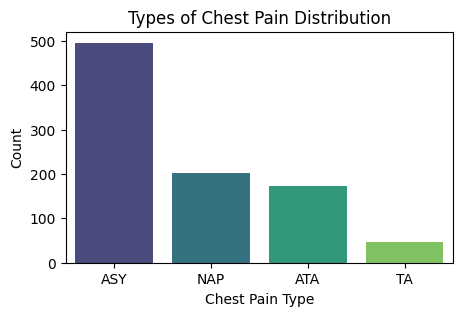

In [ ]:
# different types of chest pain count
chest_pain_count = df['ChestPainType'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=chest_pain_count.index, y=chest_pain_count, palette='viridis')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Types of Chest Pain Distribution')
plt.show()

<Figure size 700x500 with 0 Axes>

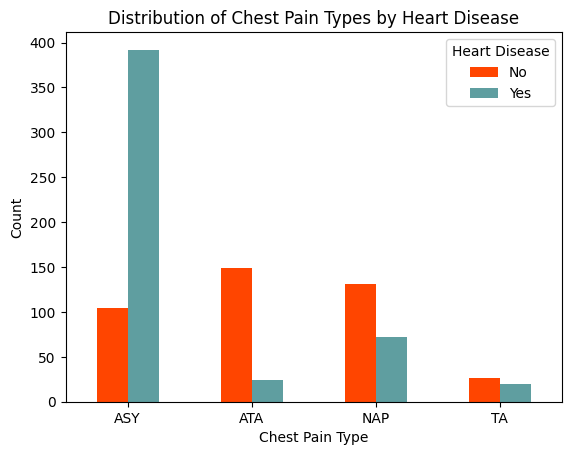

In [ ]:
cp_hd_counts = pd.crosstab(df['ChestPainType'], df['HeartDisease'])
plt.figure(figsize=(7, 5))
cp_hd_counts.plot(kind='bar', color=['orangered', 'cadetblue'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Types by Heart Disease')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

<Figure size 700x500 with 0 Axes>

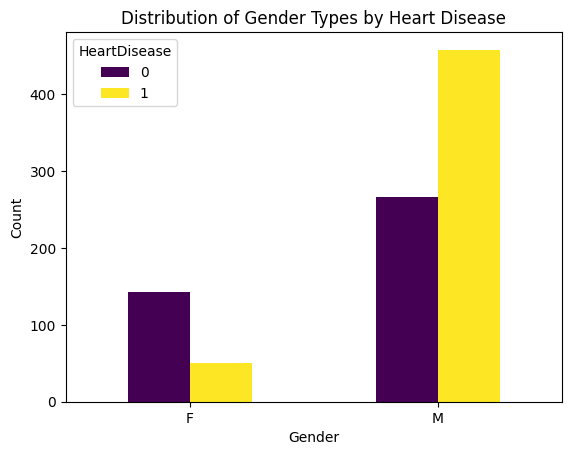

In [ ]:
gender_heart_disease_counts = pd.crosstab(df['Sex'], df['HeartDisease'])
plt.figure(figsize=(7, 5))
gender_heart_disease_counts.plot(kind='bar', cmap='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender Types by Heart Disease')
plt.xticks(rotation=0)
plt.show()

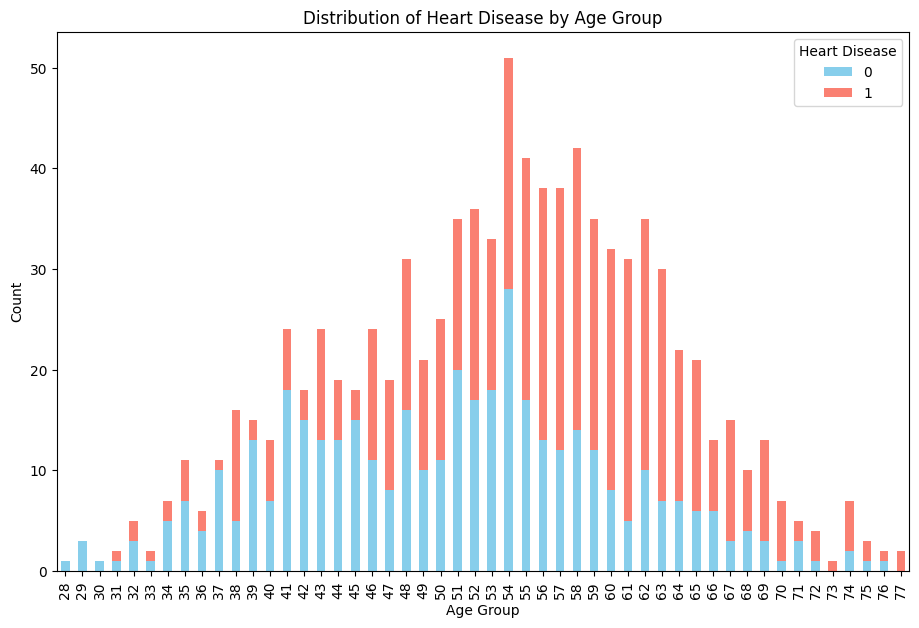

In [ ]:
age_heart_disease_counts = pd.crosstab(df['Age'], df['HeartDisease'])
fig, ax = plt.subplots(figsize=(11, 7))
age_heart_disease_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], ax=ax)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease by Age Group')
plt.legend(title='Heart Disease', labels=[0, 1])
plt.show()

<Figure size 500x300 with 0 Axes>

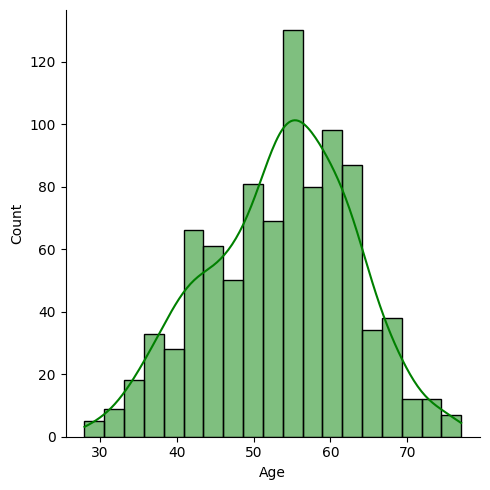

<Figure size 500x300 with 0 Axes>

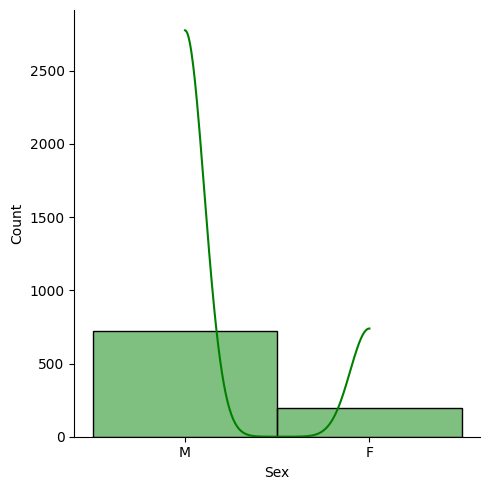

<Figure size 500x300 with 0 Axes>

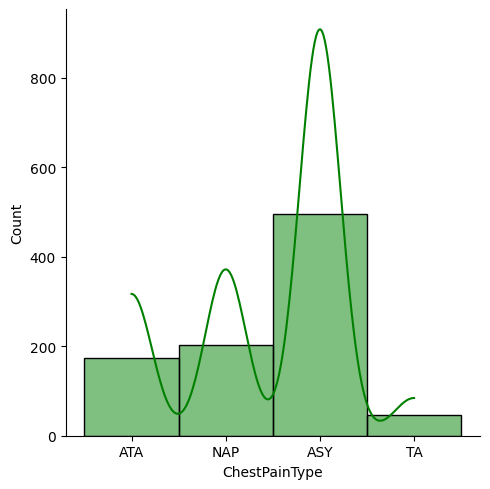

<Figure size 500x300 with 0 Axes>

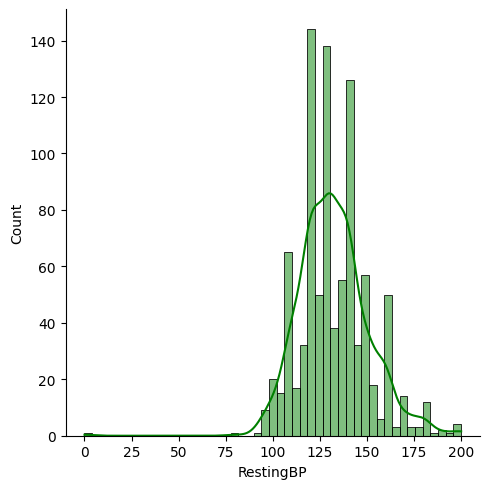

<Figure size 500x300 with 0 Axes>

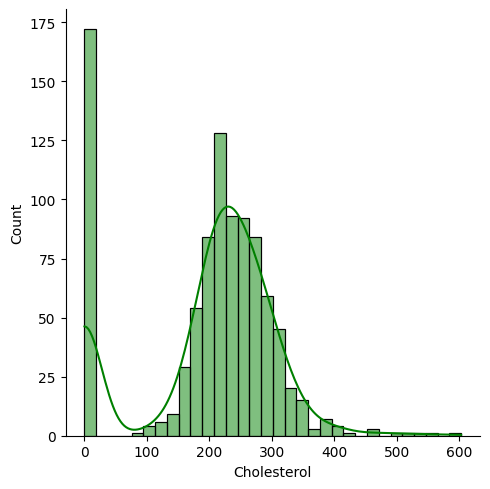

<Figure size 500x300 with 0 Axes>

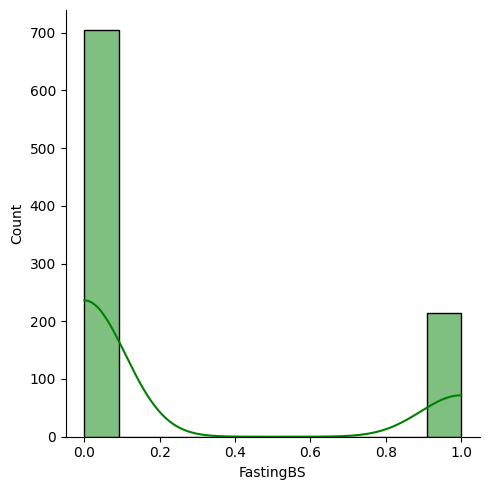

<Figure size 500x300 with 0 Axes>

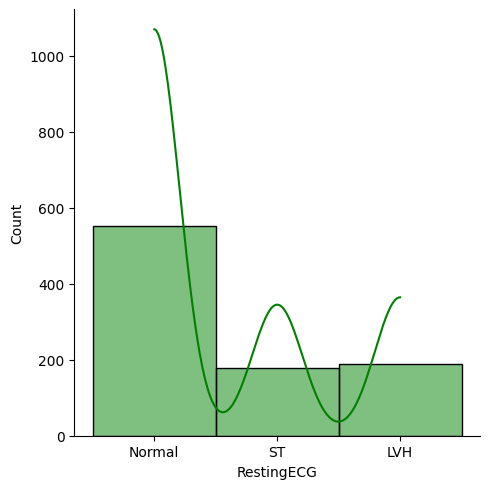

<Figure size 500x300 with 0 Axes>

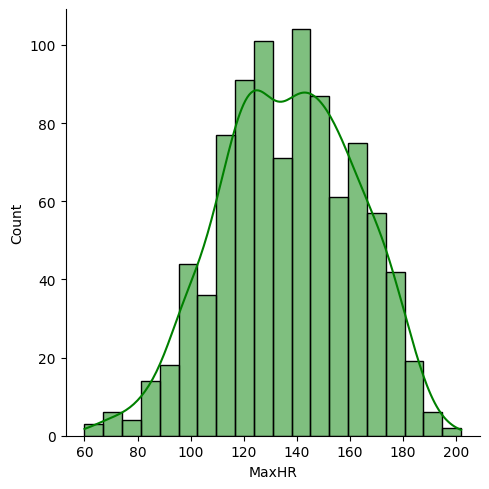

<Figure size 500x300 with 0 Axes>

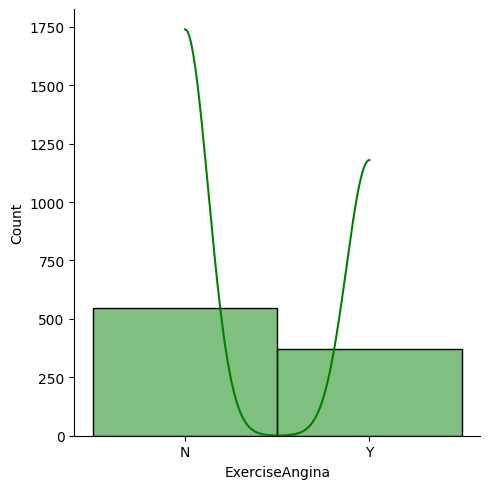

<Figure size 500x300 with 0 Axes>

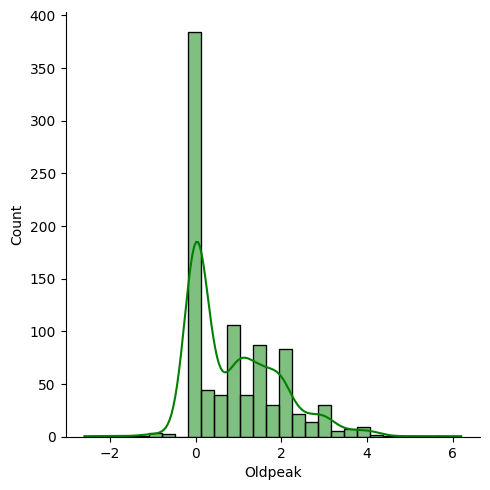

<Figure size 500x300 with 0 Axes>

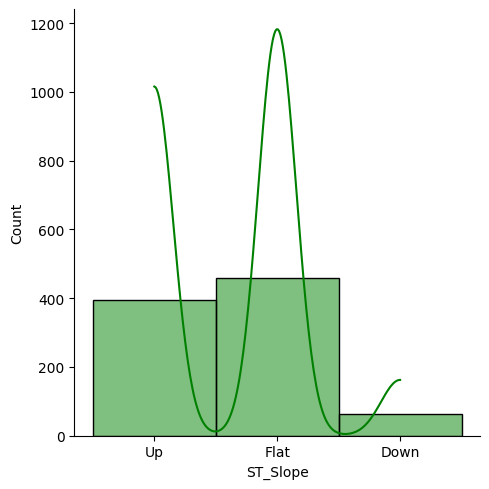

<Figure size 500x300 with 0 Axes>

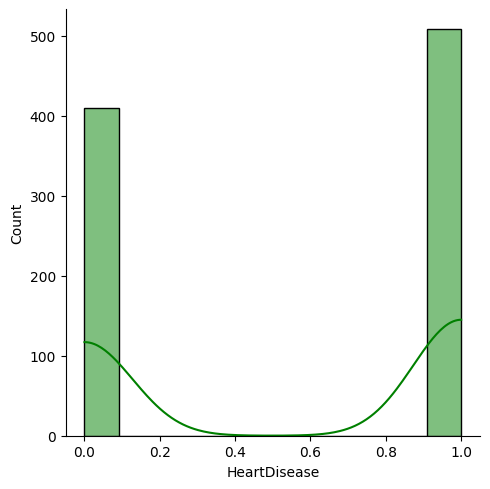

In [ ]:
for c in df.columns:
    plt.figure(figsize=(5,3))
    sns.displot(data=df[c], kde= True, color='green')
    plt.show()

**Data Preprocessing**

In [ ]:
df_1 = df.copy()

In [ ]:
# put categorical & numerical attributes in different variables
X_categorical = df_1[['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']]
X_numerical = df_1.drop(['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'], axis=1)

In [ ]:
X_categorical.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
X_numerical.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [ ]:
X_categorical = pd.get_dummies(X_categorical)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_numerical)
X_scaled = scaler.transform(X_numerical)
X_scaled = pd.DataFrame(X_scaled, index=X_numerical.index, columns= X_numerical.columns)
X = pd.concat([X_scaled, X_categorical], axis=1)
y = df_1['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Model training**

In [ ]:
# Support vector machine
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100],
             'gamma': [0.25, 0.75, 0.5, 1],
             'kernel': ['linear', 'rbf', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.884 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.841 total time=   0.0s
[CV 4/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.825 total time=   0.0s
[CV 5/5] END ..C=0.1, gamma=0.25, kernel=linear;, score=0.854 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.826 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.848 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.775 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.781 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.25, kernel=rbf;, score=0.810 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.25, kernel=poly;, score=0.855 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.25, kernel=poly

{'C': 0.1, 'gamma': 0.25, 'kernel': 'poly'}

In [ ]:
svm = SVC(C=0.1, gamma=0.25, kernel='poly')
svm_m = svm.fit(X_train, y_train)
svm_pred = svm_m.predict(X_test)
svm_as = accuracy_score(y_test, svm_pred) * 100
svm_as = "{:.2f}".format(svm_as)
print('Accuracy of SVM:', svm_as)

print("Classification Report:")
print(classification_report(y_test, svm_pred))

Accuracy of SVM: 87.39
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        98
           1       0.93      0.85      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_m = nb.fit(X_train, y_train)
nb_pred = nb_m.predict(X_test)
nb_as = accuracy_score(y_test, nb_pred) * 100
nb_as = "{:.2f}".format(nb_as)
print('Accuracy of NB:', nb_as)

print("Classification Report:")
print(classification_report(y_test, nb_pred))

Accuracy of NB: 87.39
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        98
           1       0.92      0.86      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



In [ ]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_m = knn.fit(X_train, y_train)
knn_pred = knn_m.predict(X_test)
kn_as = accuracy_score(y_test, knn_pred) * 100
kn_as = "{:.2f}".format(kn_as)
print('Accuracy of KNN:', kn_as)

print("Classification Report:")
print(classification_report(y_test, knn_pred))

Accuracy of KNN: 87.83
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        98
           1       0.91      0.87      0.89       132

    accuracy                           0.88       230
   macro avg       0.87      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rf_m = rfc.fit(X_train, y_train)
rf_pred = rf_m.predict(X_test)
rf_as = accuracy_score(y_test, rf_pred) * 100
rf_as = "{:.2f}".format(rf_as)
print("Accuracy of RF:", rf_as)

print("Classification Report:")
print(classification_report(y_test, rf_pred))

Accuracy of RF: 88.70
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        98
           1       0.92      0.88      0.90       132

    accuracy                           0.89       230
   macro avg       0.88      0.89      0.89       230
weighted avg       0.89      0.89      0.89       230



In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lgc = LogisticRegression()
lg_m = lgc.fit(X_train, y_train)
lg_pred = lg_m.predict(X_test)
lgc_as = accuracy_score(y_test, lg_pred) * 100
lgc_as = "{:.2f}".format(lgc_as)
print('Accuracy of LG:', lgc_as)

print("Classification Report:")
print(classification_report(y_test, lg_pred))

Accuracy of LG: 86.52
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        98
           1       0.90      0.86      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc_m = abc.fit(X_train, y_train)
abc_pred = abc_m.predict(X_test)
ab_as = accuracy_score(y_test, abc_pred) * 100
ab_as = "{:.2f}".format(ab_as)
print('Accuracy of AdaBoost:', ab_as)

print("Classification Report: ")
print(classification_report(y_test, abc_pred))

Accuracy of AdaBoost: 84.78
Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        98
           1       0.91      0.82      0.86       132

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [ ]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc_m = gbc.fit(X_train, y_train)
gbc_pred = gbc_m.predict(X_test)
gb_as = accuracy_score(y_test, gbc_pred) * 100
gb_as = "{:.2f}".format(gb_as)
print("Accuracy of Gradient Boost:", gb_as)

print("Classification Report: ")
print(classification_report(y_test, gbc_pred))

Accuracy of Gradient Boost: 86.96
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.85      0.88       132

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.87      0.87      0.87       230



In [ ]:
# XGBoost
from xgboost import XGBClassifier
xgc = XGBClassifier()
xgc_m = xgc.fit(X_train, y_train)
xgc_pred = xgc_m.predict(X_test)
xg_as = accuracy_score(y_test, xgc_pred) * 100
xg_as = "{:.2f}".format(xg_as)
print("Accuracy of XGBoost:", xg_as)

print("Classification Report: ")
print(classification_report(y_test, xgc_pred))

Accuracy of XGBoost: 86.52
Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        98
           1       0.92      0.84      0.88       132

    accuracy                           0.87       230
   macro avg       0.86      0.87      0.86       230
weighted avg       0.87      0.87      0.87       230



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla = VotingClassifier(estimators=[('RF', rfc), ('KNN', knn)], voting='soft')
two_cla.fit(X_train, y_train)
pred = two_cla.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred) * 100))
print(classification_report(y_test, pred))

Accuracy: 90.00
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla_1 = VotingClassifier(estimators=[('LG', lgc),('RF', rfc)], voting='soft')
two_cla_1.fit(X_train, y_train)
pred_1 = two_cla_1.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred_1) * 100))
print(classification_report(y_test, pred_1))

Accuracy: 88.26
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        98
           1       0.90      0.89      0.90       132

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230



In [ ]:
from sklearn.ensemble import VotingClassifier
two_cla_2 = VotingClassifier(estimators=[('RF', rfc), ('GB', gbc)], voting='soft')
two_cla_2.fit(X_train, y_train)
pred_2 = two_cla_2.predict(X_test)
print('Accuracy: %.2f' % (accuracy_score(y_test, pred_2) * 100))
print(classification_report(y_test, pred_2))

Accuracy: 90.00
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        98
           1       0.92      0.90      0.91       132

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



Confusion matrix of RF+KNN


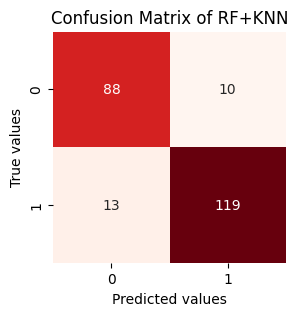

In [ ]:
print('Confusion matrix of RF+KNN')

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix of RF+KNN")
plt.show()

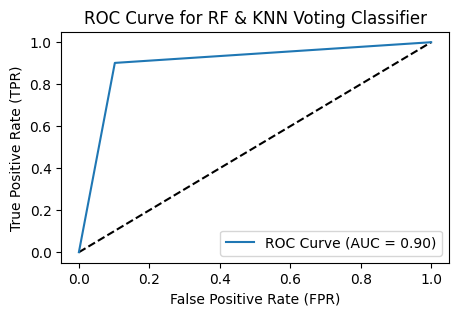

In [ ]:
# ROC/AUC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure(figsize=(5, 3))
two_cla_auc = roc_auc_score(y_test, pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(two_cla_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for RF & KNN Voting Classifier')
plt.legend(loc='lower right')
plt.show()